In [1]:
import pathlib
import pandas as pd
import numpy as np
import sys
import os
from icecream import ic

In [2]:
from compute_full_df import collect_scores

sys.path.append(os.path.abspath("../"))
from utils import aggregate_rank_corrs, plot_rank_corrs

In [3]:
sys.path.append(os.path.abspath("../../"))
from paths import resources_path

scores_path = resources_path / pathlib.Path("scores/pretrain_finetune/scores.pkl")
full_df_path = resources_path / pathlib.Path("full_dfs/pretrain_finetune/full_df.csv")
# full_df_path = resources_path / pathlib.Path("full_dfs/pretrain_finetune/full_df_self_computed.csv")

# Load `full_df`

In [4]:
full_df = pd.read_csv(full_df_path)

# Dataframe subsetting

In [5]:
def best_seed_pair(task):
    _, acc_dict = collect_scores(scores_path)
    acc_array = acc_dict[task].flatten()
    idxs = acc_array.argsort()[-1:][::-1]
    ref_seeds = []
    for idx in idxs:
        ref_seeds.append( (int(idx / 10), idx % 10))
    return ref_seeds[0]

In [6]:
def ftvft_sub_df(df, task, ref_depth):
    # find best seed for the task
    best_pre_seed, best_fine_seed=best_seed_pair(task)

    # select rows of full_df corresponding to the reference layer (layer depth and both seeds)
    sub_df = df[(df.layer1 == ref_depth) & (df.layer2 == ref_depth) & (((df.pre_seed1 == best_pre_seed) & (df.fine_seed1 == best_fine_seed)) | ((df.pre_seed2 == best_pre_seed) & (df.fine_seed2 == best_fine_seed)))]

    return sub_df

# Rank correlation results

In [7]:
METRICS = ["Procrustes", "CKA", "PWCCA"]
num_layers = 8 # medium

## First task: `antonymy`

In [8]:
task = "STRESS_ANTONYMY"
rho, rho_p, tau, tau_p, bad_fracs = aggregate_rank_corrs(full_df, task, num_layers, METRICS, ftvft_sub_df)

In [9]:
# average all of these over the different reference layers
for metric in METRICS:
    avg_rho = round(np.mean(rho[metric]), 3)
    avg_rho_p = format(np.mean(rho_p[metric]), ".1e")
    avg_tau = round(np.mean(tau[metric]), 3)
    avg_tau_p = format(np.mean(tau_p[metric]), ".1e")
    ic(metric, avg_rho, avg_rho_p, avg_tau, avg_tau_p)
    

ic| metric: 'Procrustes'
    avg_rho: 0.243
    avg_rho_p: '3.0e-02'
    avg_tau: 0.178
    avg_tau_p: '2.6e-02'
ic| metric: 'CKA'
    avg_rho: 0.227
    avg_rho_p: '7.2e-02'
    avg_tau: 0.16
    avg_tau_p: '6.9e-02'
ic| metric: 'PWCCA'
    avg_rho: 0.204
    avg_rho_p: '5.2e-02'
    avg_tau: 0.152
    avg_tau_p: '3.2e-02'


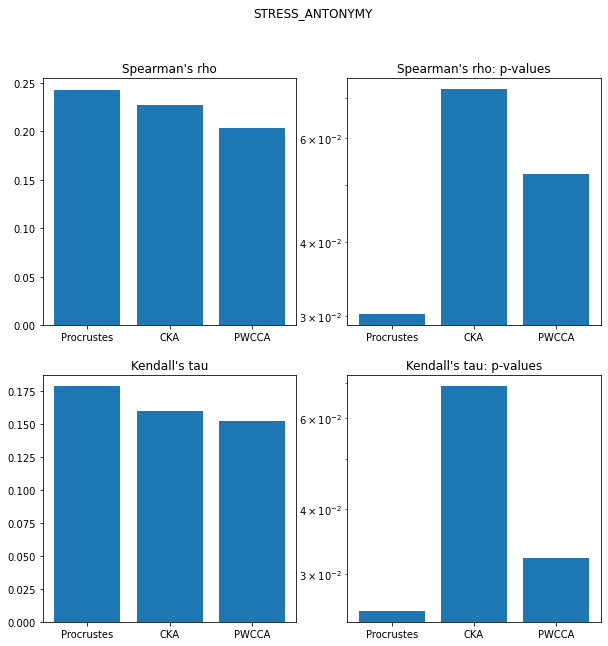

In [10]:
plot_rank_corrs(rho, rho_p, tau, tau_p, METRICS, title = task)

## Second task: `numerical`

In [11]:
task = "STRESS_NUMERICAL"
rho, rho_p, tau, tau_p, bad_fracs = aggregate_rank_corrs(full_df, task, num_layers, METRICS, ftvft_sub_df)

In [12]:
# average all of these over the different reference layers
for metric in METRICS:
    avg_rho = round(np.mean(rho[metric]), 3)
    avg_rho_p = format(np.mean(rho_p[metric]), ".1e")
    avg_tau = round(np.mean(tau[metric]), 3)
    avg_tau_p = format(np.mean(tau_p[metric]), ".1e")
    ic(metric, avg_rho, avg_rho_p, avg_tau, avg_tau_p)

ic| metric: 'Procrustes'
    avg_rho: 0.071
    avg_rho_p: '3.1e-01'
    avg_tau: 0.049
    avg_tau_p: '3.0e-01'
ic| metric: 'CKA'
    avg_rho: 0.122
    avg_rho_p: '1.8e-01'
    avg_tau: 0.084
    avg_tau_p: '1.7e-01'
ic| metric: 'PWCCA'
    avg_rho: 0.031
    avg_rho_p: '4.2e-01'
    avg_tau: 0.023
    avg_tau_p: '4.1e-01'


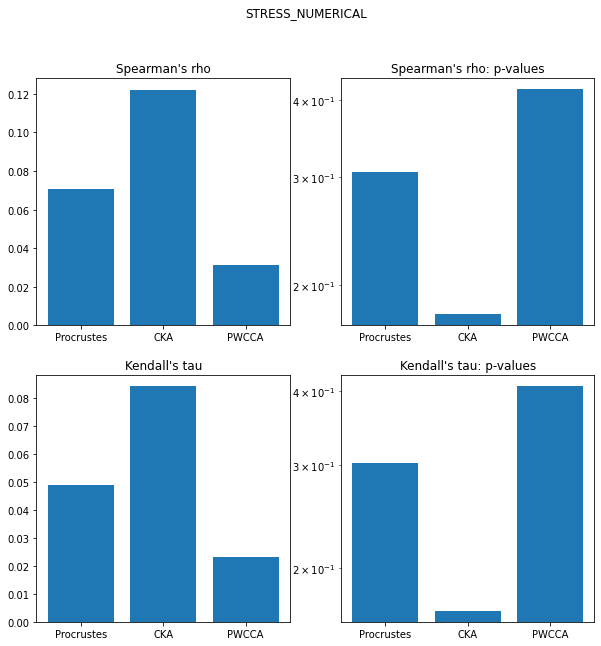

In [13]:
plot_rank_corrs(rho, rho_p, tau, tau_p, METRICS, title = task)